#Data Preparation

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv('googleplaystore.csv')

In [86]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [87]:
df_copy = df.copy()

In [88]:
df_copy.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [89]:
df_copy.Reviews

,Reviews
0,159
1,967
2,87510
3,215644
4,967
...,...
10836,38
10837,4
10838,3
10839,114


In [90]:
df_copy.drop_duplicates(inplace=True)

In [91]:
df_copy.reset_index(drop=True, inplace=True)

In [92]:
df_copy.shape

(10358, 13)

In [93]:
df_copy[~df_copy.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [94]:
df_copy.drop(index=df_copy.index[9990], inplace=True)

In [95]:
df_copy.shape

(10357, 13)

In [96]:
df_copy.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [97]:
df_copy['Reviews'] = df_copy['Reviews'].astype('int')

In [98]:
df_copy.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [99]:
df_copy.Installs

,Installs
0,"10,000+"
1,"500,000+"
2,"5,000,000+"
3,"50,000,000+"
4,"100,000+"
...,...
10353,"5,000+"
10354,100+
10355,"1,000+"
10356,"1,000+"


In [100]:
a = '12M'

In [101]:
def clean_size(x):
    if x[-1] == 'M':
        return float(x.replace('M', '')) * 1024
    elif x[-1] == 'k':
        return float(x.replace('k', ''))
    else:
        return np.NaN

In [102]:
clean_size(a)

12288.0

In [103]:
df_copy['Size'] = df_copy.Size.apply(clean_size)

In [104]:
df_copy.Size

,Size
0,19456.0
1,14336.0
2,8908.8
3,25600.0
4,2867.2
...,...
10353,54272.0
10354,3686.4
10355,9728.0
10356,NaN


In [105]:
df_copy.Size = df_copy.Size.astype('float')

In [106]:
df_copy.Size.dtype

dtype('float64')

In [107]:
df_copy.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [108]:
df_copy.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [109]:
chars = ['+', ',', '$']
cols = ['Installs','Price']
for char in chars:
  for col in cols:
    df_copy[col] = df_copy[col].apply(lambda x: x.replace(char, ''))


In [110]:
df_copy['Price'] = df_copy['Price'].astype('float')


In [111]:
df_copy.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [112]:
df_copy['Installs'] = df_copy['Installs'].astype('int')
df_copy.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


In [113]:
df_copy['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [114]:
def convert_to_float(version_str):
    if isinstance(version_str, str):
        # Handle "and up" and extract the version
        if 'and up' in version_str:
            version_str = version_str.split(' and')[0]
        # Handle ranges like "4.0.3 - 7.1.1"
        if '-' in version_str:
            version_str = version_str.split(' -')[0]  # Take the minimum version in the range
        # Handle non-numeric suffixes like "4.4W"
        version_str = ''.join(c if c.isdigit() or c == '.' else '' for c in version_str)
        # Convert the version string to a float, if possible
        try:
            version_parts = version_str.split('.')
            # If version has more than two parts, we can add precision by using the first two parts
            version_float = float('.'.join(version_parts[:2]))  # Use major and minor version
            return version_float
        except ValueError:
            return np.nan  # If conversion fails, return NaN
    return np.nan  # For NaN or non-string values

In [115]:
df_copy['Android Ver'] = df_copy['Android Ver'].apply(convert_to_float)

In [116]:
df_copy['Android Ver'].unique()

array([4. , 4.2, 4.4, 2.3, 3. , 4.1, nan, 2.2, 5. , 6. , 1.6, 1.5, 2.1,
       7. , 5.1, 4.3, 2. , 3.2, 7.1, 8. , 3.1, 1. ])

In [117]:
df_copy.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


In [118]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

In [119]:
df_copy['Day'] = pd.to_datetime(df_copy['Last Updated']).dt.day
df_copy['Month'] = pd.to_datetime(df_copy['Last Updated']).dt.month
df_copy['Year'] = pd.to_datetime(df_copy['Last Updated']).dt.year

In [120]:
df_copy.

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


In [121]:
df_copy.drop('Last Updated', axis = 1, inplace = True)

In [122]:
df_copy.duplicated('App').sum()

698

In [124]:
df_copy= df_copy.drop_duplicates(subset = ['App'], keep = 'first')

In [127]:
df_copy[df_copy.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year


In [138]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10357
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     8667 non-null   float64
 12  Day             9659 non-null   int32  
 13  Month           9659 non-null   int32  
 14  Year            9659 non-null   int32  
dtypes: float64(4), int32(3), int64(2), object(6)
memory usage: 1.1+ MB


In [128]:
df_copy.shape

(9659, 15)

In [129]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

#From here we will perform EDA

bifercate the columns categorical columns and numerical columns


In [135]:
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

In [144]:
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']

In [143]:
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']

In [147]:
df_copy[categorical_features].describe()

,App,Category,Type,Content Rating,Genres,Current Ver
count,9659,9659,9658,9659,9659,9651
unique,9659,33,2,6,118,2817
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,Free,Everyone,Tools,Varies with device
freq,1,1832,8902,7903,826,1055


In [ ]:
#Categorical data >> freq plot, bar chart, pie chart
#Numerical data >> histogram, distplot, scatter plot, box plot, line chart, pair plot

In [154]:
#Categorical feature analysis
print(f"{df_copy['Type'].value_counts(normalize = True) * 100}")

Type
Free    92.172292
Paid     7.827708
Name: proportion, dtype: float64


In [155]:
for col in categorical_features:
  print(f"{df_copy[col].value_counts(normalize = True) * 100}")

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE                 3.5

In [156]:
df_copy['Android Ver'].value_counts(normalize = True) * 100

,proportion
Android Ver,
4.0,30.944964
4.1,25.418253
2.3,10.257298
4.4,9.565017
5.0,5.953617
4.2,4.292143
2.2,2.769124
3.0,2.665282
4.3,2.549902


Making some plots


In [157]:
df_copy['Type'].value_counts(normalize = True) * 100


,proportion
Type,
Free,92.172292
Paid,7.827708


<Axes: xlabel='Type', ylabel='count'>

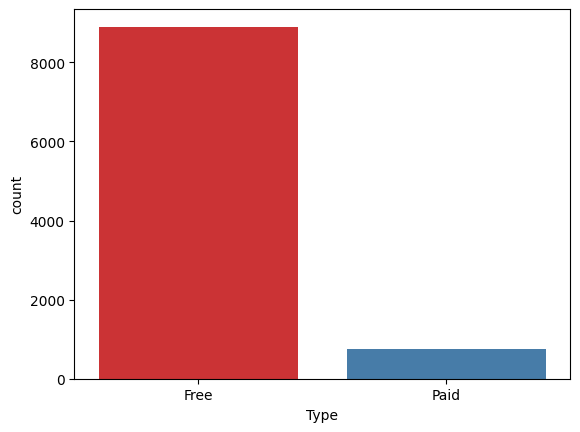

In [167]:
sns.countplot(x = df_copy['Type'], palette = 'Set1')

<Axes: xlabel='Content Rating', ylabel='count'>

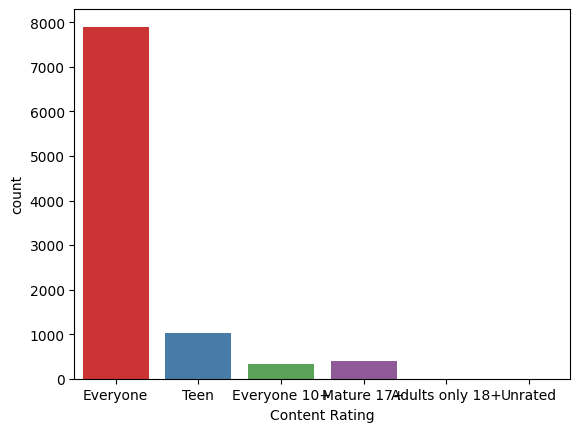

In [170]:
sns.countplot(x = df_copy['Content Rating'], palette = 'Set1')

<Axes: xlabel='Category', ylabel='count'>

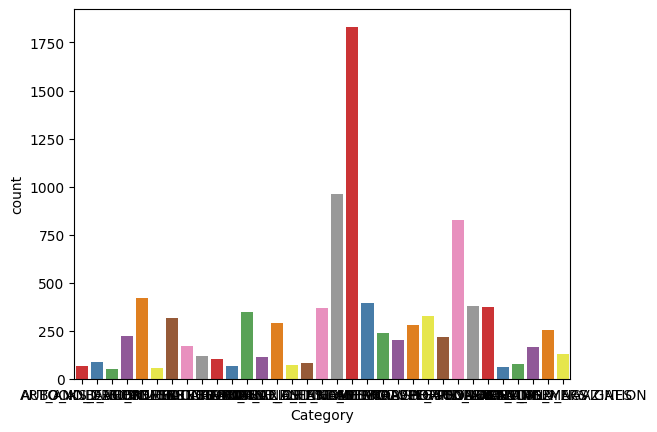

In [169]:
sns.countplot(x = df_copy['Category'], palette = 'Set1')


<Axes: xlabel='Android Ver', ylabel='count'>

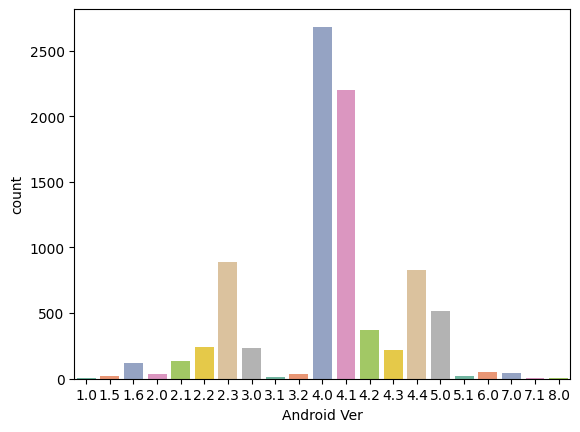

In [168]:
sns.countplot(x = df_copy['Android Ver'], palette = 'Set2')

Numerical Features

In [171]:
numerical_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Android Ver',
 'Day',
 'Month',
 'Year']

<Axes: xlabel='Price', ylabel='Density'>

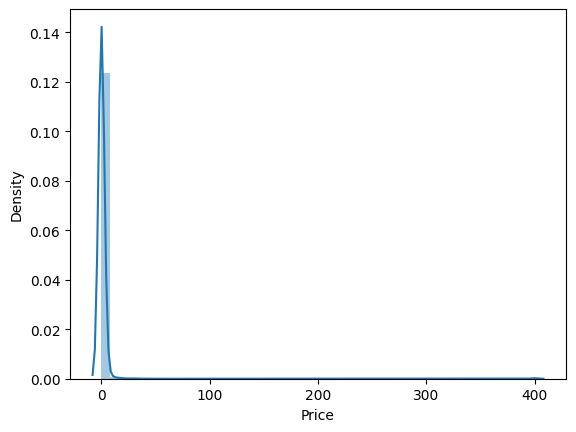

In [172]:
sns.distplot(df_copy['Price'], kde = True)

<Axes: xlabel='Reviews', ylabel='Density'>

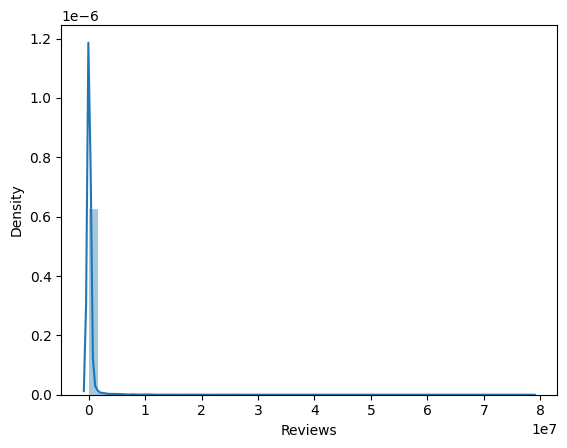

In [173]:
sns.distplot(df_copy['Reviews'], kde = True)

<Axes: xlabel='Size', ylabel='Density'>

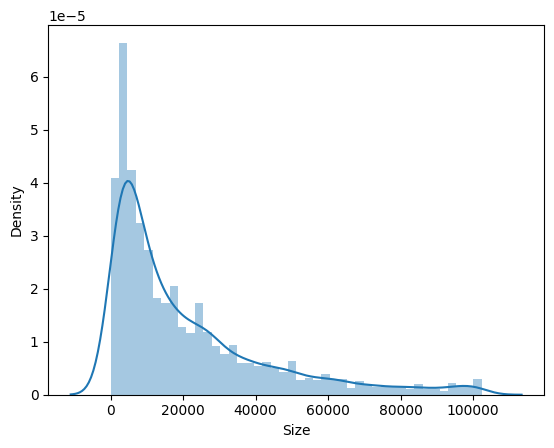

In [174]:
sns.distplot(df_copy['Size'], kde = True)

<Axes: xlabel='Rating', ylabel='Density'>

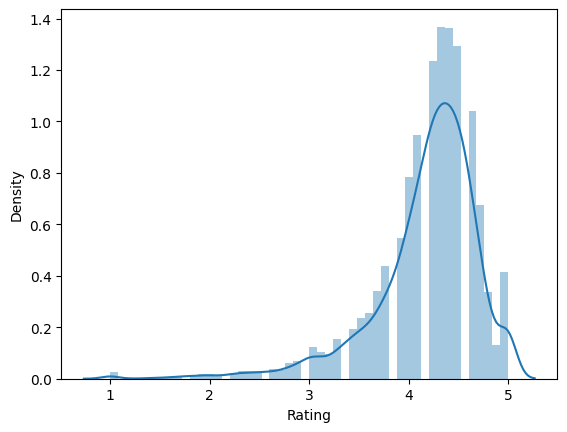

In [177]:
sns.distplot(df_copy['Rating'], kde = True)


<Axes: xlabel='Installs', ylabel='Density'>

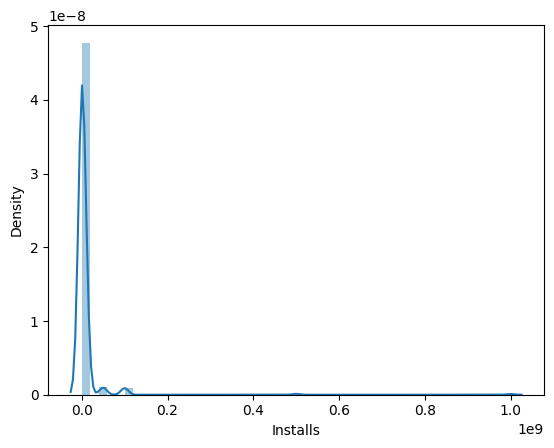

In [178]:
sns.distplot(df_copy['Installs'], kde = True)


<Axes: xlabel='Android Ver', ylabel='Density'>

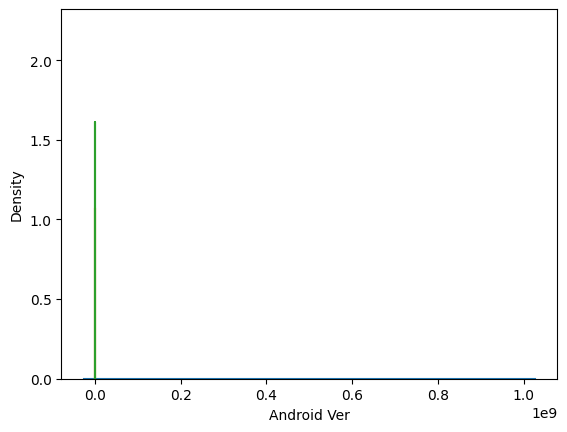

In [176]:
sns.distplot(df_copy['Installs'], kde = True)
sns.distplot(df_copy['Rating'], kde = True)
sns.distplot(df_copy['Android Ver'], kde = True)

<Axes: xlabel='Rating', ylabel='Density'>

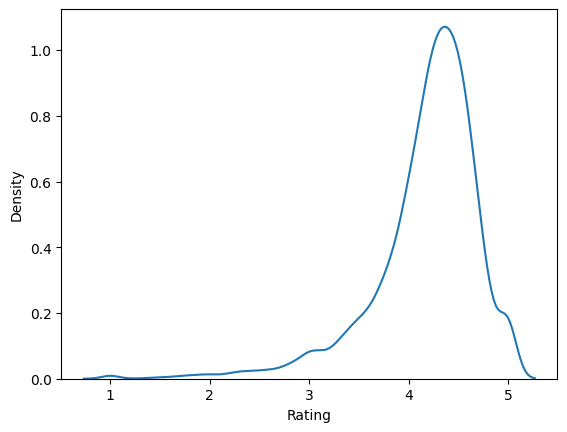

In [179]:
sns.kdeplot(df_copy['Rating'])

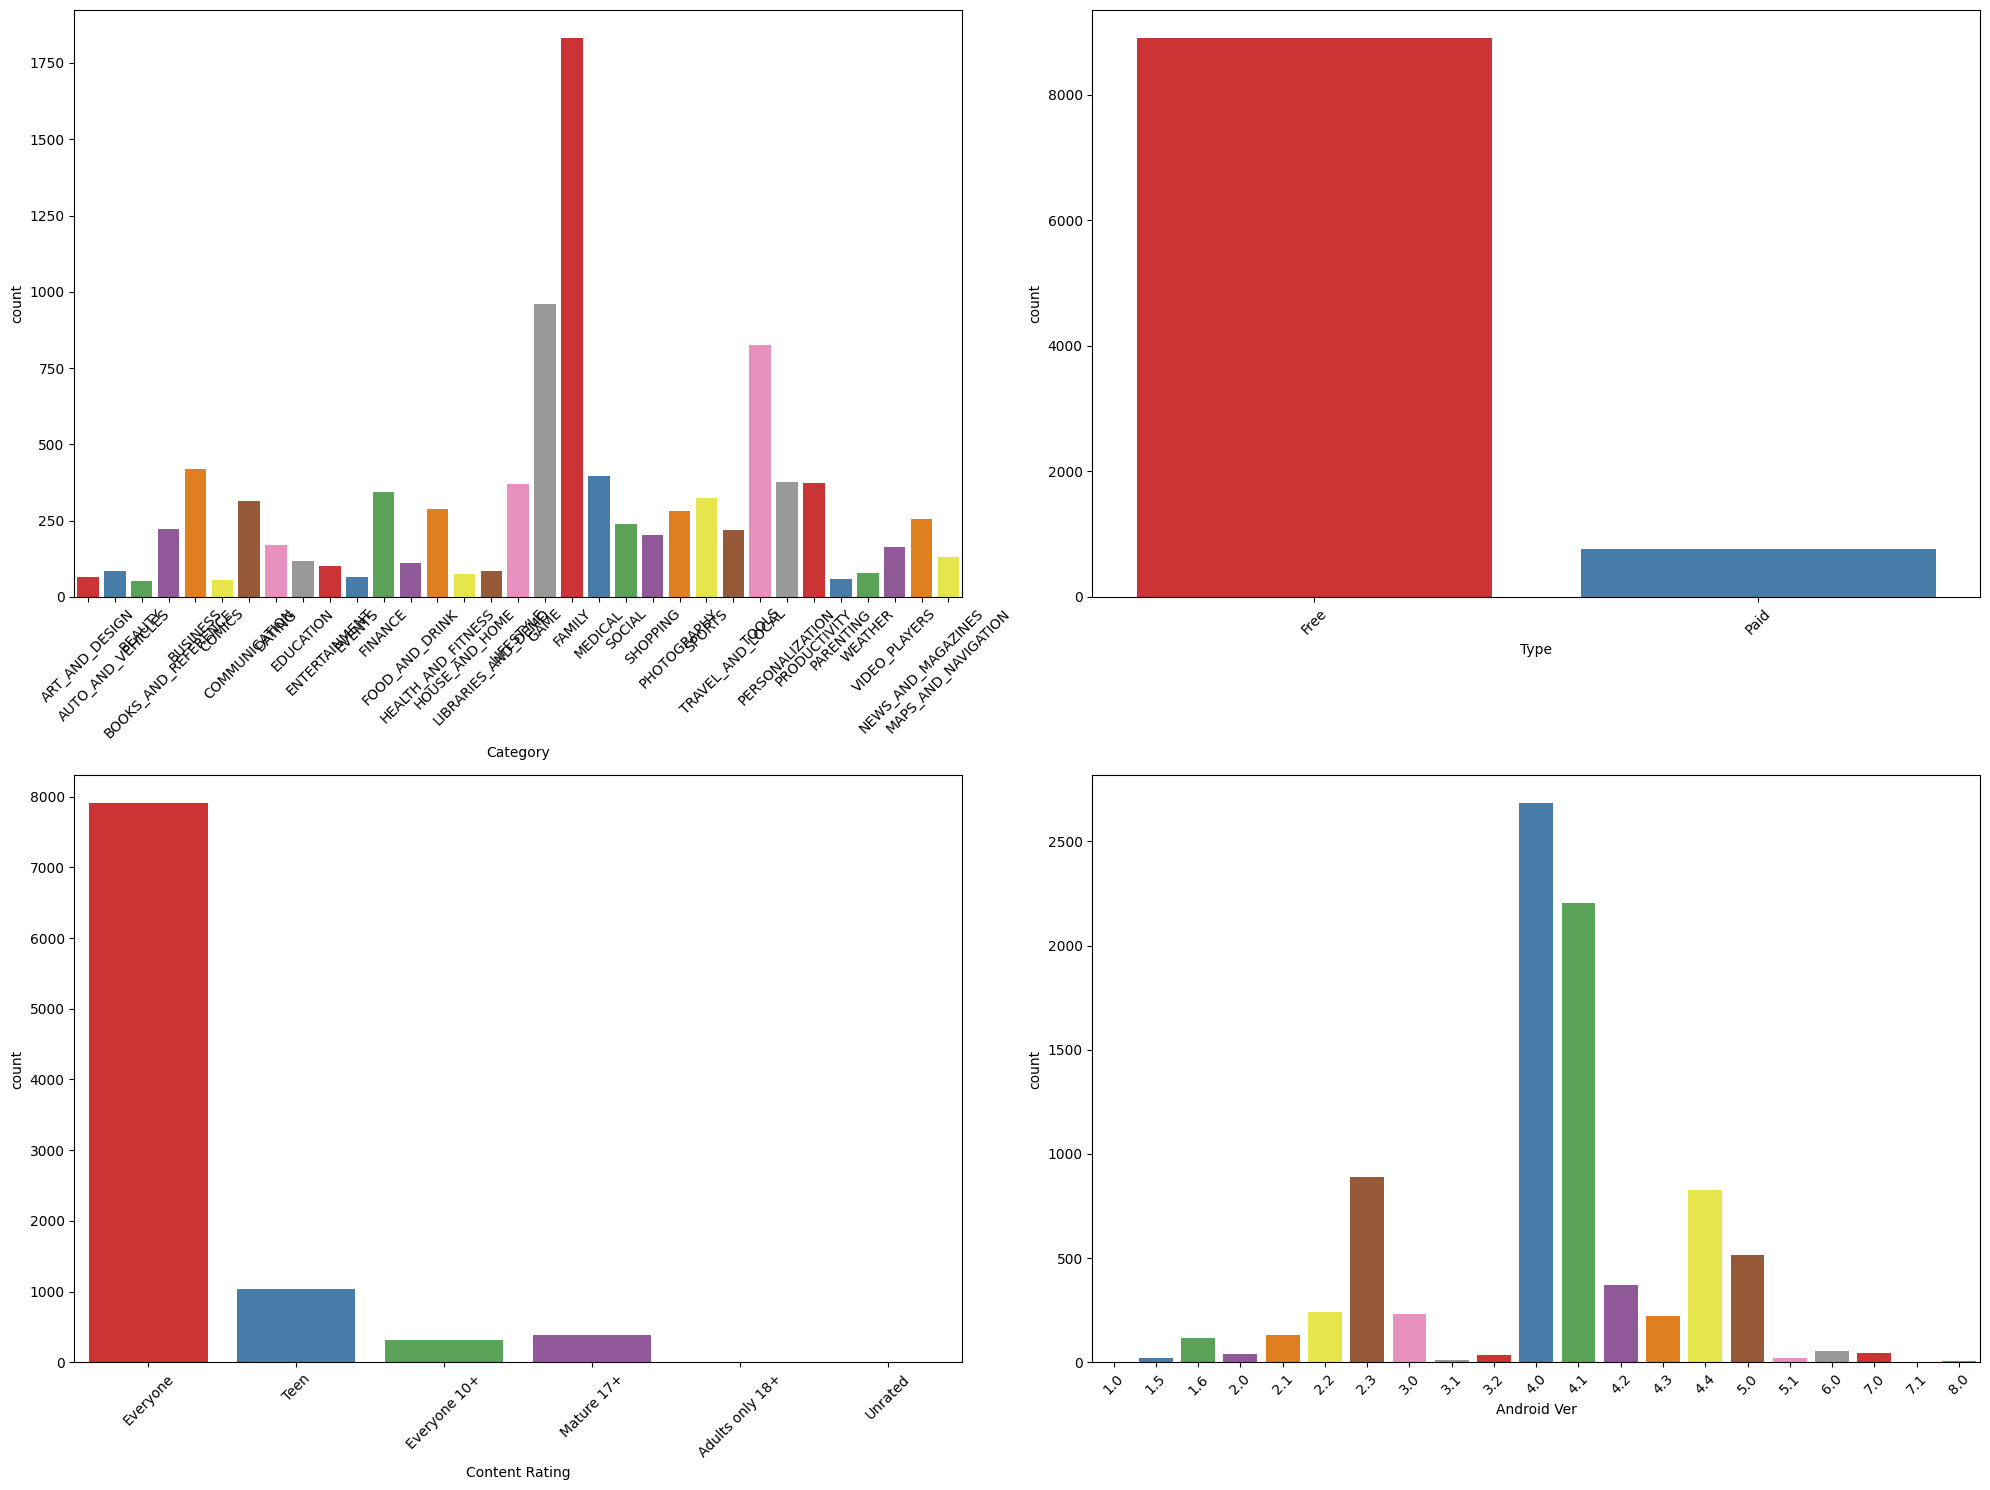

In [185]:
plt.figure(figsize = (20,15))
category = ['Category', 'Type', 'Content Rating', 'Android Ver']
for i in range(len(category)):
  plt.subplot(2,2,i+1)
  sns.countplot(x = df_copy[category[i]], palette = 'Set1')
  plt.xlabel(category[i])
  plt.xticks(rotation = 45)
  plt.tight_layout()

Qn:- Which category is the most popular category in the app

<Axes: ylabel='count'>

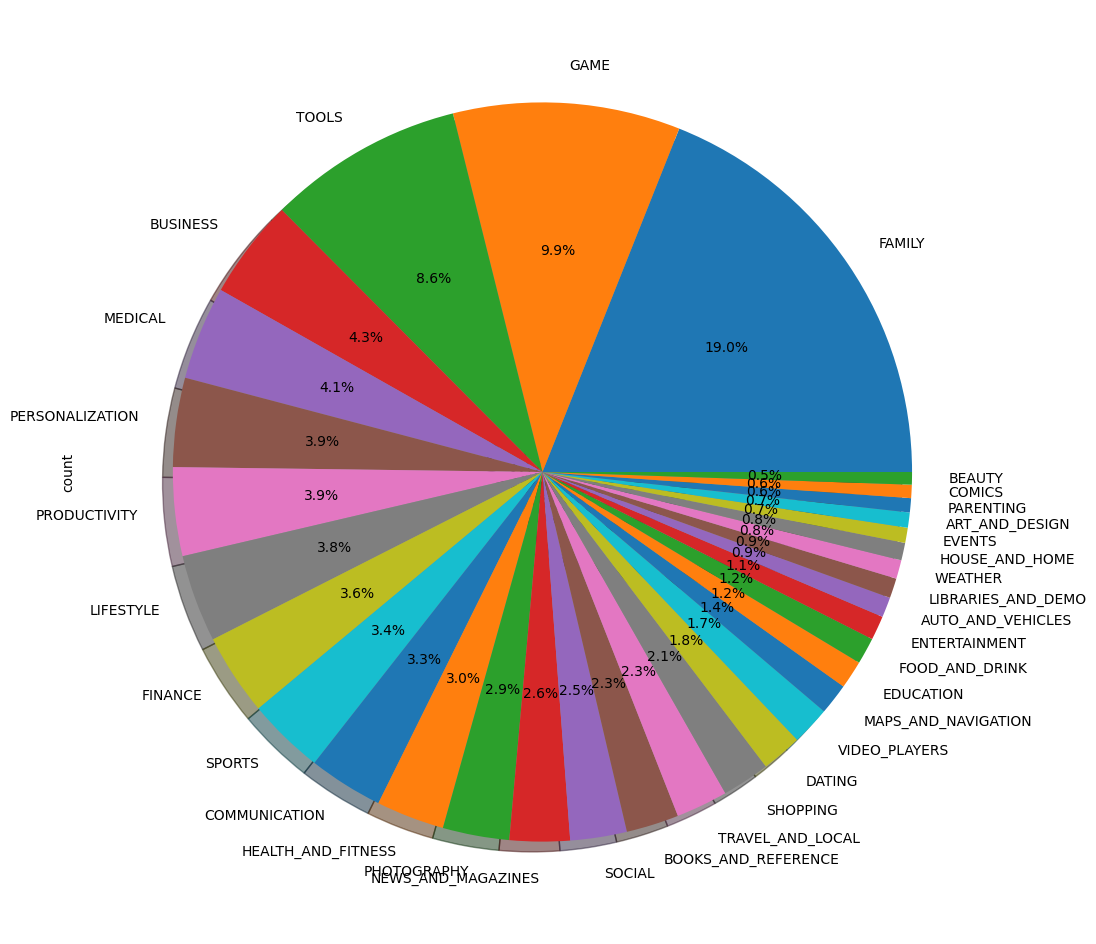

In [191]:
df_copy['Category'].value_counts().plot.pie(y = df['Category'], figsize = (12,12), autopct = '%1.1f%%', shadow = True)

#insights>> the most popular category as Family with 19% of the share

#Qn2:- What is the top 10 most popular category


<Axes: ylabel='count'>

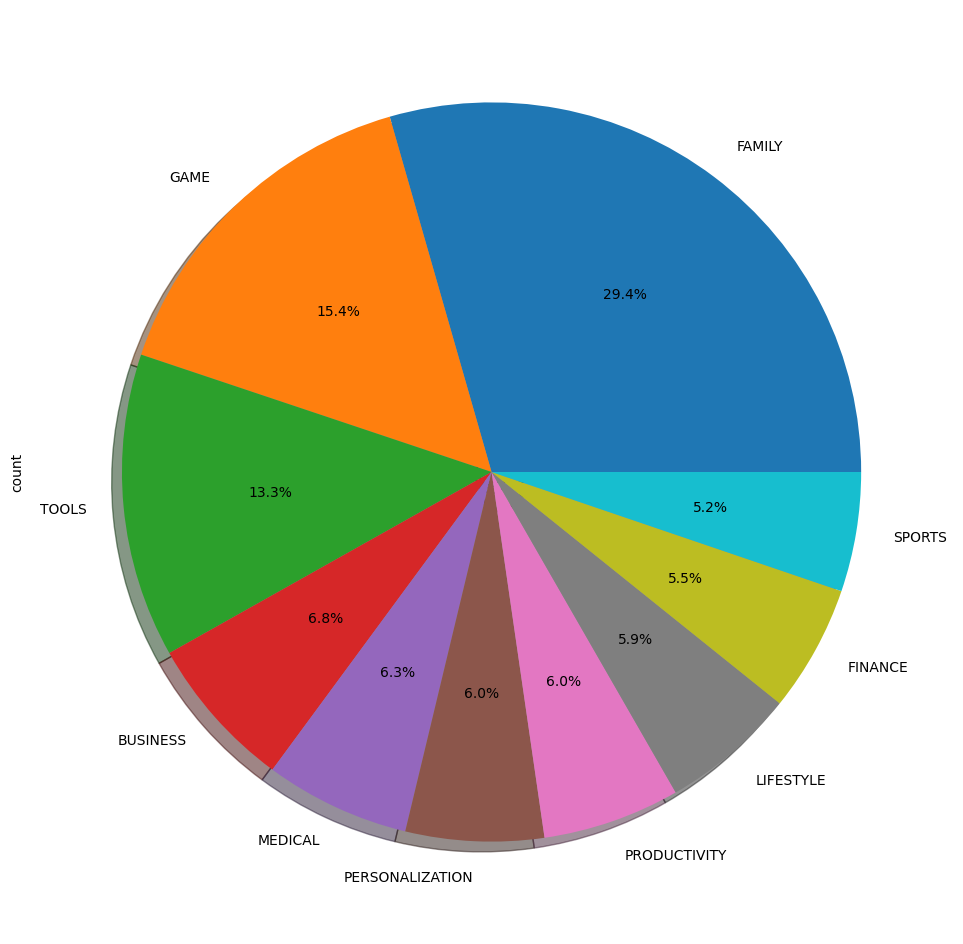

In [192]:
df_copy['Category'].value_counts().head(10).plot.pie(y = df['Category'], figsize = (12,12), autopct = '%1.1f%%', shadow = True)

QN:- which category has the highest installetion

In [195]:
df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


<Axes: ylabel='Rating'>

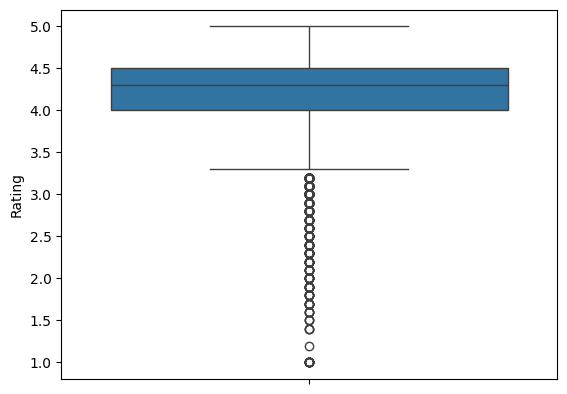

In [199]:
sns.boxplot(df_copy['Rating'])

<Axes: xlabel='Installs', ylabel='Rating'>

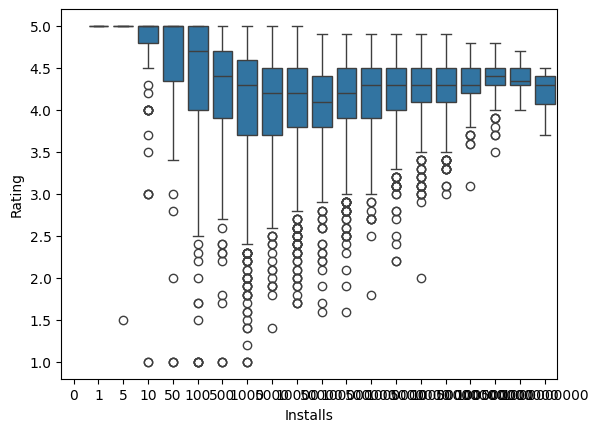

In [202]:
sns.boxplot(x = 'Installs', y ='Rating', data = df_copy)

#Home Work:-

1. What are the top 5 installed category apps in each type? >> game app of free
2.[HINT] groupby on category and type column with aggregation on Installs columns

3. Which category app users are reviewing the most? Social  Facebook

4. [HINT] groupby category and app, aggregated sum on reviews

In [206]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

In [209]:
cat = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()[:5]

<Axes: xlabel='Category', ylabel='Installs'>

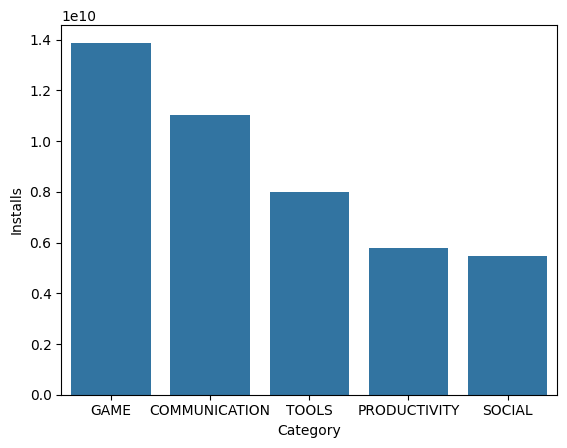

In [213]:
sns.barplot(x = cat['Category'], y = cat['Installs'], data = df_copy)

In [216]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

In [217]:
#QN2:- Ans:-
cat1 = df_copy.groupby(['App'])['Reviews'].sum().sort_values(ascending = False).reset_index()[:5]

In [218]:
cat1

,App,Reviews
0,Facebook,78158306
1,WhatsApp Messenger,69119316
2,Instagram,66577313
3,Messenger – Text and Video Chat for Free,56642847
4,Clash of Clans,44891723


<Axes: xlabel='App', ylabel='Reviews'>

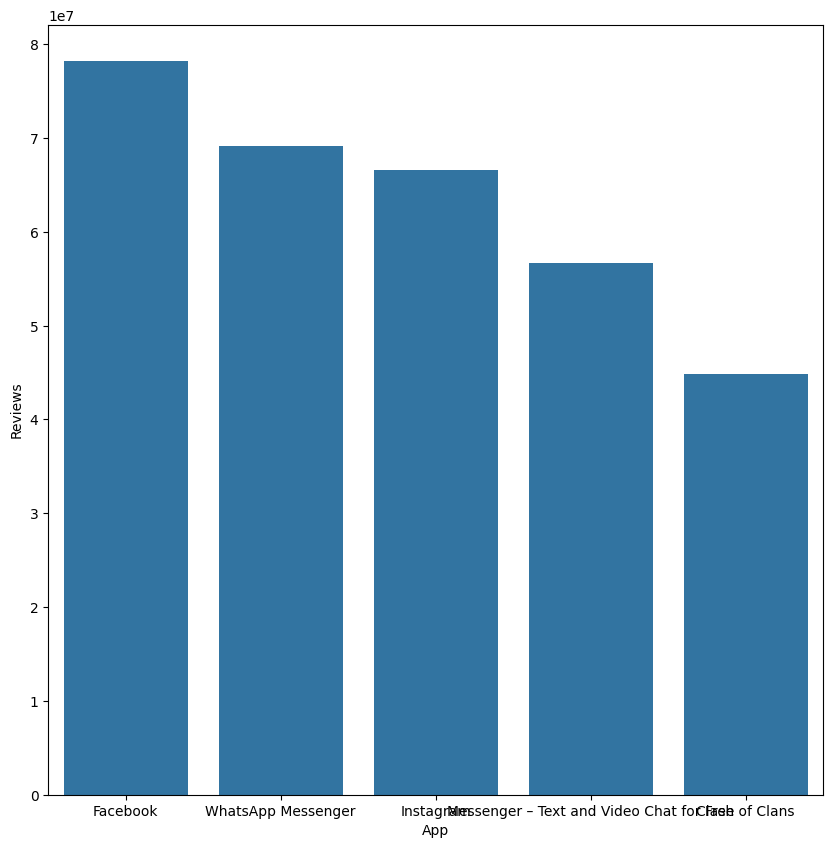

In [220]:
plt.figure(figsize = (10,10))
sns.barplot(x = cat1['App'], y = cat1['Reviews'], data = df_copy)